# 2.- Implement the training process for a DL model using an off-the-shelf PyTorch model

## Load an off-the-shelf model

PyTorch provides several state-of-the-art models with their corresponding pre-trained paramaeters through the **torchvision** package

In [6]:
import torchvision

In [7]:
# Take an off-the-shelf and load its pre-trained parameters
model = torchvision.models.inception_v3(weights=torchvision.models.Inception_V3_Weights, progress=True)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:04<00:00, 25.0MB/s]


To train a model from scratch, lets download some data and use it as our *training set*

In [8]:
#@title Install FiftyOne package to use open source image datasets
!pip install fiftyone 
import fiftyone as fo
import fiftyone.zoo as foz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━

INFO:fiftyone.migrations.runner:Migrating database to v0.20.1


We'll train a DL model to identify cats in images. For that we gather some images with cats, and other images without cats.
That will make the model more robust when inferring if the image contains or not a cat 

In [9]:
#@title Download some images from the Fiftyone dataset
dataset = foz.load_zoo_dataset(
    "open-images-v7",
    split="train",
    label_types=["classifications"],
    classes = ["Cat"],
    max_samples=1000,
    dataset_dir="sample_data",
    download_if_necessary=True
)

INFO:fiftyone.zoo.datasets:Downloading split 'train' to 'sample_data/train' if necessary


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/train/train-images-boxable-with-rotation.csv' to 'sample_data/train/metadata/image_ids.csv'


 100% |██████|    4.8Gb/4.8Gb [15.4s elapsed, 0s remaining, 333.6Mb/s]      


INFO:eta.core.utils: 100% |██████|    4.8Gb/4.8Gb [15.4s elapsed, 0s remaining, 333.6Mb/s]      


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv' to 'sample_data/train/metadata/classes.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/bbox_labels_600_hierarchy.json' to '/tmp/tmpk6wa_7j9/metadata/hierarchy.json'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/train-annotations-human-imagelabels-boxable.csv' to 'sample_data/train/labels/classifications.csv'


INFO:fiftyone.utils.openimages:Downloading 1000 images


 100% |█████████████████| 1000/1000 [2.3m elapsed, 0s remaining, 8.1 files/s]       


INFO:eta.core.utils: 100% |█████████████████| 1000/1000 [2.3m elapsed, 0s remaining, 8.1 files/s]       


Dataset info written to 'sample_data/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to 'sample_data/info.json'


Loading 'open-images-v7' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'open-images-v7' split 'train'


 100% |███████████████| 1000/1000 [4.5s elapsed, 0s remaining, 349.9 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1000/1000 [4.5s elapsed, 0s remaining, 349.9 samples/s]      


Dataset 'open-images-v7-train-1000' created


INFO:fiftyone.zoo.datasets:Dataset 'open-images-v7-train-1000' created


To load the images that we downloaded into python, we use a **Dataset**. This object will load each image and its corresponding label so we can use it to feed our model.

In [10]:
#@title This is a wrapper that allows us to use FiftyOne datasets with PyTorch
import matplotlib.pyplot as plt
import torch
from PIL import Image


class FiftyOneTorchDataset(torch.utils.data.Dataset):
    """A class to construct a PyTorch dataset from a FiftyOne dataset.
    
    Args:
        fiftyone_dataset: a FiftyOne dataset or view that will be used for training or testing
        transforms (None): a list of PyTorch transforms to apply to images and targets when loading
        gt_field ("ground_truth"): the name of the field in fiftyone_dataset that contains the 
            desired labels to load
        classes (None): a list of class strings that are used to define the mapping between
            class names and indices. If None, it will use all classes present in the given fiftyone_dataset.
    """

    def __init__(
        self,
        fiftyone_dataset,
        transforms=None,
        classes=None,
    ):
        self.samples = fiftyone_dataset
        self.transforms = transforms
        self.img_paths = self.samples.values("filepath")

        self.classes = classes

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        sample = self.samples[img_path]
        metadata = sample.metadata
        img = Image.open(img_path).convert("RGB")

        label = any(lab["label"] in self.classes
                    for lab in sample["positive_labels"]["classifications"])
        target = torch.as_tensor(label, dtype=torch.float32)

        if self.transforms is not None:
            img = self.transforms(img)

        return img, target

    def __len__(self):
        return len(self.img_paths)

    def get_classes(self):
        return self.classes

## Explore the dataset

Each image can have an arbitrary shape, so we resize all of them to have a standard shape of 299x299 pixels. This is the shape *Inception V3* expects as inputs.

In [11]:
preprocess_fun = torchvision.transforms.Compose([
    torchvision.transforms.Resize((299, 299)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


In [12]:
pt_dataset = FiftyOneTorchDataset(dataset,
                                  classes=["Cat"],
                                  transforms=preprocess_fun
                                  )

In [14]:
x, l = pt_dataset[100]

In [15]:
x.shape

torch.Size([3, 299, 299])

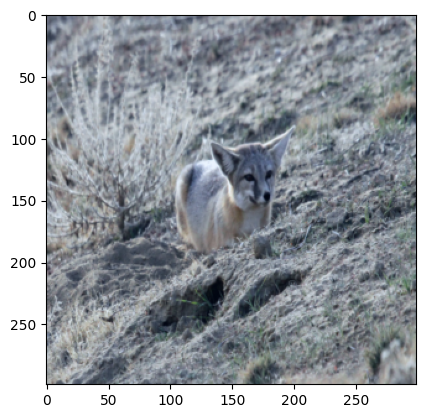

In [21]:
im = (x - x.min()) / (x.max() - x.min())
plt.imshow(im.permute(1, 2, 0))

In [19]:
y_hat = model(x[None, ...])
y_hat.shape

torch.Size([1, 1000])

In [20]:
y_hat.argmax()

tensor(280)

Check the label assigned by Inception to this image here https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/



---



## Train an off-the-shelf model from scratch

In this exercise we'll train the Inception V3 model to idenfity cats.
This is a classification tasks, and we only need that the model returns 1 if a cat is present in an image, and 0 otherwise.

In [29]:
# Load an off-the-shelf model (Inception V3), without pre-trained parameters
model = torchvision.models.inception_v3(weights=None, num_classes=1)

This time we use the *Binary Cross Entropy (BCE)* loss function because there are only two possible outcomes [0, 1].

In PyTorch this function is implemented as **nn.BCEWithLogitsLoss**. The *WithLogits* part of the name means that PyTorch applies the appropriate transformations to the output of the model to map them into a [0, 1] response.

In [26]:
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader

In [27]:
criterion = nn.BCEWithLogitsLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

trn_queue = DataLoader(pt_dataset, batch_size=16, shuffle=True, pin_memory=True)

In [32]:
# Move the model to the GPU memory
model.train()
model.cuda()

for e in range(10):
  for i, (x, y) in enumerate(trn_queue):
    # Empty the accumulated gradients from any previous iteration
    optimizer.zero_grad()

    # Move the input images and their respective classes to the GPU
    x = x.cuda()
    y = y.cuda()

    y_hat = model(x)

    # Compute the error/loss function
    loss = criterion(y_hat.logits, y.view(-1, 1))

    # Perform the backward pass to generate the gradients of the loss function with respect to the inputs
    loss.backward()

    # Update the model parameters
    optimizer.step()

    # Log the progress of the model
    if i % 10 == 0:
      acc = torch.sum(y == y_hat.logits.detach().argmax(dim=1)) / x.shape[0]

      print(f"Epoch {e}, step {i}: loss={loss.item()}, acc={acc}")

Epoch 0, step 0: loss=1.4420979022979736, acc=0.4375
Epoch 0, step 10: loss=1.0122545957565308, acc=0.4375
Epoch 0, step 20: loss=1.375662088394165, acc=0.25
Epoch 0, step 30: loss=0.8887996077537537, acc=0.4375
Epoch 0, step 40: loss=1.3998281955718994, acc=0.4375
Epoch 0, step 50: loss=1.0483871698379517, acc=0.5625
Epoch 0, step 60: loss=2.1652798652648926, acc=0.3125
Epoch 1, step 0: loss=1.1367876529693604, acc=0.4375
Epoch 1, step 10: loss=1.9114607572555542, acc=0.3125
Epoch 1, step 20: loss=1.2286837100982666, acc=0.625
Epoch 1, step 30: loss=1.1393550634384155, acc=0.25
Epoch 1, step 40: loss=1.9128236770629883, acc=0.5
Epoch 1, step 50: loss=1.0997657775878906, acc=0.625
Epoch 1, step 60: loss=1.5939254760742188, acc=0.5
Epoch 2, step 0: loss=1.2647711038589478, acc=0.25
Epoch 2, step 10: loss=0.9781365990638733, acc=0.4375
Epoch 2, step 20: loss=1.3332350254058838, acc=0.4375
Epoch 2, step 30: loss=1.1632148027420044, acc=0.375
Epoch 2, step 40: loss=1.1303980350494385, acc=